In [38]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pandas as pd
import tensorflow as tf
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
df = pd.read_csv("Resources\pokemon_combats_etl.csv")
df.head()

,first_effectiveness,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,second_effectiveness,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner
0,3.5,50,64,50,45,50,41,0,0,6.0,70,70,40,60,40,60,0,0,1
1,6.0,91,90,72,90,129,108,0,1,3.5,91,129,90,72,90,108,0,1,1
2,2.0,55,40,85,80,105,40,0,0,2.0,75,75,75,125,95,40,0,0,1
3,0.5,40,40,40,70,40,20,0,0,1.0,77,120,90,60,90,48,0,0,1
4,6.0,70,60,125,115,70,55,0,0,4.0,20,10,230,10,230,5,0,0,0


In [24]:
# Split our preprocessed data into our features and target arrays
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Creating an initial baseline Neural Network
nn = tf.keras.models.Sequential()

# First Layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=18))

# Second Layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8307 - loss: 0.4170
Epoch 2/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9132 - loss: 0.2664
Epoch 3/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9384 - loss: 0.1887
Epoch 4/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9452 - loss: 0.1713
Epoch 5/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9465 - loss: 0.1620
Epoch 6/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9489 - loss: 0.1560
Epoch 7/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9489 - loss: 0.1508
Epoch 8/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9529 - loss: 0.1414
Epoch 9/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9545 - loss: 0.1392
Epoch 10/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9550 - loss: 0.1359
Epoch 11/100
1017/1017 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9569 - loss: 0.1283
Epoch 12/100
1017/

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

255/255 - 1s - 4ms/step - accuracy: 0.9456 - loss: 0.1959
Loss: 0.19590117037296295, Accuracy: 0.9456334710121155


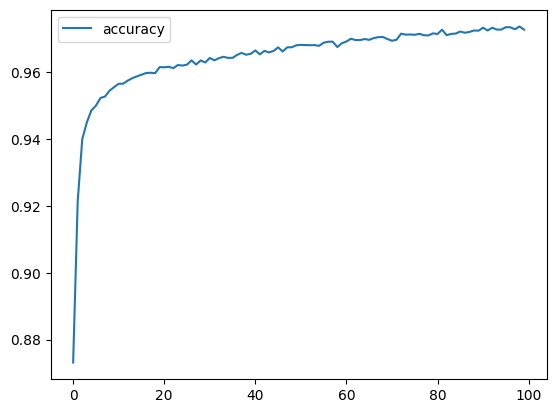

In [28]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="accuracy")
plt.show()

In [30]:
def pokemon_nn(layers=1, optimizer='adam', activation='relu', neurons=64, epochs=100):

    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=neurons, activation=activation, input_dim=18))
    for _ in range(layers):
        nn.add(tf.keras.layers.Dense(units=neurons, activation=activation))  # Hidden layers
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    nn.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)

    return nn

In [31]:
model = KerasClassifier(build_fn=pokemon_nn, verbose=0, neurons=64, activation='relu', layers=2)

param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'LeakyReLU'],
    'neurons': [32, 64, 128, 256],
    'layers': [1, 2, 3],
    'epochs': [50, 100, 150]
    }

nn_random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3).fit(X_train_scaled, y_train)

print("Best parameters found: ", nn_random_search.best_params_)
print("Best score found: ", nn_random_search.best_score_)


C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future r

Best parameters found:  {'optimizer': 'adam', 'neurons': 256, 'layers': 2, 'epochs': 50, 'activation': 'relu'}
Best score found:  0.9831775872989638


In [32]:
best_random = nn_random_search.best_estimator_
predictions_nn = best_random.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, predictions_nn)}")
print(f"Precision: {precision_score(y_test, predictions_nn)}")
print(f"Recall: {recall_score(y_test, predictions_nn)}")

Accuracy: 0.9445264452644526
Precision: 0.9517960602549247
Recall: 0.9441379310344827


In [36]:
param_grid = {
    'optimizer': ['adam'],
    'activation': ['relu'],
    'neurons': [256],
    'layers': [1, 2, 3],
    'epochs': [25, 50, 75]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3).fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future r

Best parameters found:  {'activation': 'relu', 'epochs': 25, 'layers': 2, 'neurons': 256, 'optimizer': 'adam'}
Best score found:  0.9900664732708724


In [37]:
best_grid = grid_search.best_estimator_
predictions_grid = best_grid.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, predictions_grid)}")
print(f"Precision: {precision_score(y_test, predictions_grid)}")
print(f"Recall: {recall_score(y_test, predictions_grid)}")

Accuracy: 0.9377613776137761
Precision: 0.9518100611189468
Recall: 0.9308045977011494


In [39]:
final_nn_model = best_grid
joblib.dump('final_rf_model', 'final_nn_model.joblib')

['final_nn_model.joblib']